# Experiments with kernel machines

In this notebook we will illustrate the behavior of the Support Vector Machine when used with quadratic and RBF kernels. `Iris dataset` is used here.

The dataset contains a set of 150 records under five attributes - `petal length, petal width, sepal length, sepal width and species`. The data set consists of 50 samples from each of three species of Iris (`Iris setosa, Iris virginica and Iris versicolor`). 

Additionally, some work on decision tree classifier is shown.

In [49]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

In [50]:
from matplotlib.colors import ListedColormap

def display_data_and_boundary2(x, y, classifier, test_idx):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Determine the x1- and x2- limits of the plot
    x1_min = min(x[:,0]) - 1
    x1_max = max(x[:,0]) + 1
    x2_min = min(x[:,1]) - 1
    x2_max = max(x[:,1]) + 1
    
    plt.xlim(x1_min,x1_max)
    plt.ylim(x2_min,x2_max)
    
    # Plot the data points
    k = int(max(y)) + 1
    cols = ['rx', 'b^', 'g*','ko']
    for classes in range(k):
        plt.plot(x[(y==classes),0], x[(y==classes),1], cols[classes%4], markersize=10, label='label ' + str(classes))
        
    # Highlight test samples
    x_test, y_test = x[test_idx, :], y[test_idx] 
    plt.plot(x_test[:, 0], x_test[:, 1], cols[-1], markersize=4, label='Test set')
        
    # Construct a grid of points at which to evaluate the classifier
    grid_spacing = 0.05
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, grid_spacing), np.arange(x2_min, x2_max, grid_spacing))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) 

## Basic loading data and training model procedure

In [51]:
# Load IRIS data
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target

# Select just two of the four features
features = [0,1]
x = x[:,features]

# Train & Test data ( here test data is 0.3*150 = 45 samples)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## 1. The Kernel SVM

To solve a nonlinear problem using an SVM, we transform the training data onto a higher dimensional feature space and find a linear boundary in this higher dimentiponal space. 

We will implement the kernel SVM algorithm and use both the `quadratic and RBF kernel`, and follow roughly the same SVM routine done before.

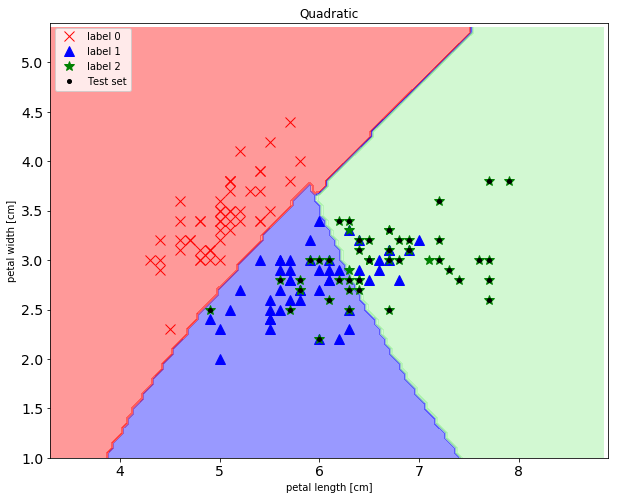

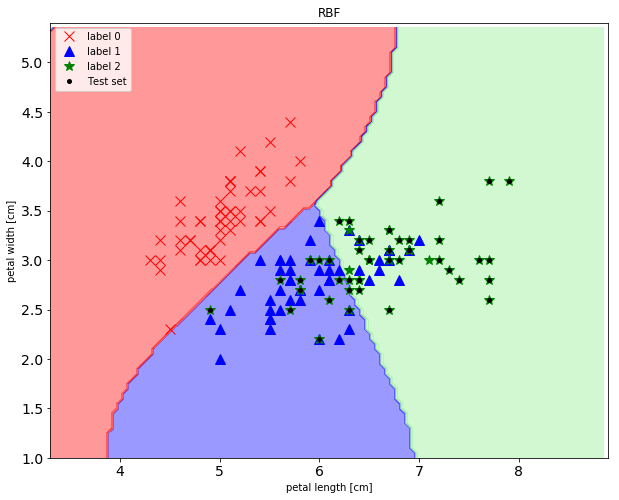

In [55]:
# Train SVM
svm = SVC(kernel='poly', degree=2, random_state=0, gamma=0.5, C=1.0)
svm.fit(x,y)
svm2 = SVC(kernel='rbf', random_state=0, gamma=0.5, C=1.0)
svm2.fit(x,y)

display_data_and_boundary2(x, y, svm, range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.title('Quadratic')
plt.rcParams["figure.figsize"] = (10,8)
plt.show()

display_data_and_boundary2(x, y, svm2, range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.title('RBF')
plt.rcParams["figure.figsize"] = (10,8)
plt.show()

The ``gamma`` parameter can be seen as a cut-off parameter for the Gaussian sphere. Increasing its value increases the influence or reach of the training samples, which leads to a softer decision boundary. Now lets increase the value of ``gamma`` and observe the effect on the decision boundary. 

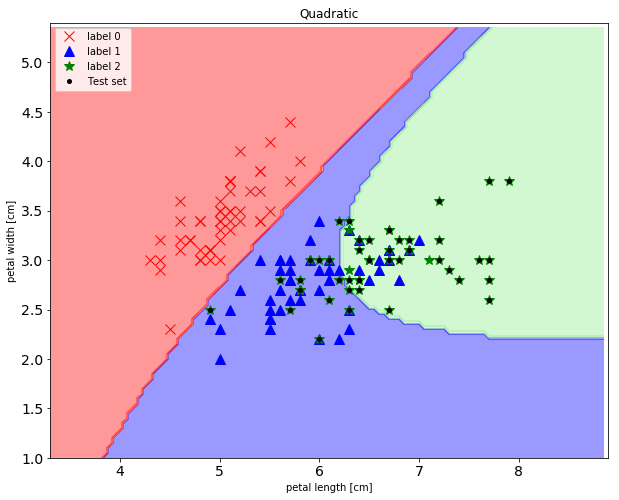

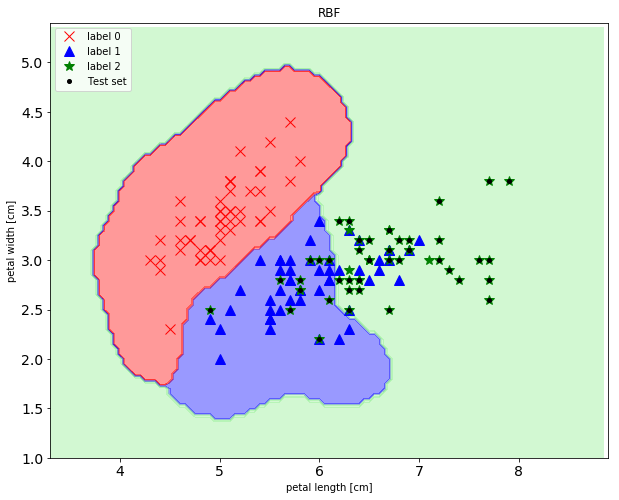

In [56]:
# Train SVM again for different gamma
svm = SVC(kernel='poly', degree=2, random_state=0, gamma=5, C=1.0)
svm.fit(x,y)
svm2 = SVC(kernel='rbf', random_state=0, gamma=5, C=1.0)
svm2.fit(x,y)

display_data_and_boundary2(x, y, svm, range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.title('Quadratic')
plt.rcParams["figure.figsize"] = (10,8)
plt.show()

display_data_and_boundary2(x, y, svm2, range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.title('RBF')
plt.rcParams["figure.figsize"] = (10,8)
plt.show()

In the plot, we can now see that the decision boundary around the 'classes 0 and 1' is much tighter using a relatively large value of ``gamma``. Although the model fits the training dataset very well, such a classifier will have a high generalization error on test data. Thus the optimization of ``gamma`` also plays an important role in controlling overfitting.

## 2. Decision tree

Decision tree classifiers are sometimes attractive models. Based on the features in the training set, the decision tree model learns a series of questions to infer the class labels of the samples. In these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels.

However, the more complex the decision boundary becomes (deeper the decision tree), can easily result in overfitting. Using scikit-learn, we will train a decision tree with a maximum depth of ``3`` using entropy as a criterion for impurity. 

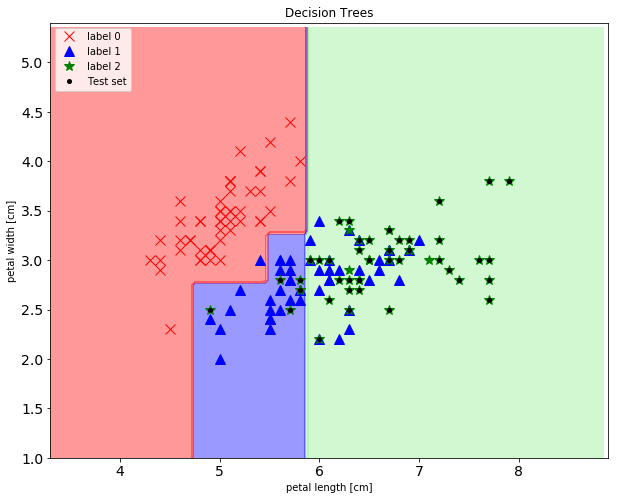

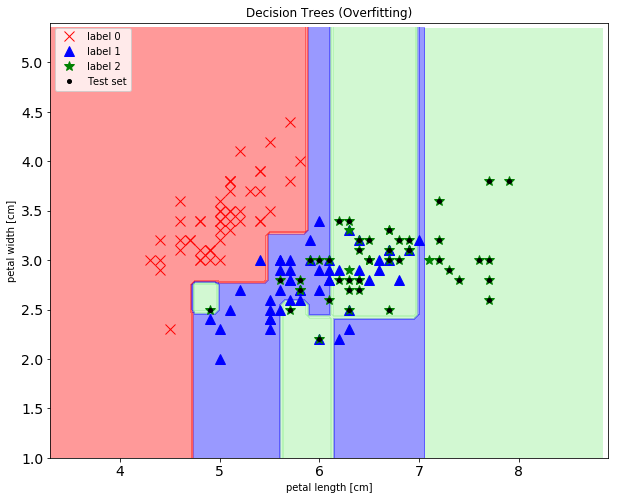

In [59]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
tree2.fit(X_train, y_train)

display_data_and_boundary2(x, y, tree, range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.title('Decision Trees')
plt.rcParams["figure.figsize"] = (10,8)
plt.show()

display_data_and_boundary2(x, y, tree2, range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.title('Decision Trees (Overfitting)')
plt.rcParams["figure.figsize"] = (10,8)
plt.show()

`Further work for interested readers:` Random forests are easy to use and have good classification performance, scalability. A random forest can be considered as an ensemble of decision
trees. The idea behind is to combine weak learners to build a more robust model that has a better generalization error (less susceptible to overfitting). 